# 4-Coloring

- This jupyter notebook can directly call ampl on two files: fourc_new.run and fourc_new.mod with specified solvers (unless specified in ample files already)
- Running time and variable value calculated are stored in
    - files in folder f
    - dataframe 
- The last section in the notebook 

## Import libraries

In [35]:

import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from amplpy import AMPL, Environment, AMPLException
import os
from IPython.display import display, Markdown

## Set variable ampl to your local AMPL folder where ampl software is stored

In [36]:

env = '/Applications/AMPL'  # put where ampl is
ampl = AMPL(Environment(env))

In [37]:
color = 4
record = 1.7272
# c = math.log(record, color)
folder = "results"

In [53]:
record

1.7272

# Solvers List

- If you have set solver in fourc_new.mod, then the below solvers list doesn't have any impact on the code.

In [132]:
# solvers = ["minos","snopt","loqo","conopt","bonmin"]# uncomment this one if you wanna test different solvers
solvers = ["minos"]
# store best running time of each solver
results_dic = {k: [] for k in solvers}

In [133]:
# we can read multiple files, but now we read only one that has all data
single_output_data = ["all"]
all_output_data = {k: dict() for k in solvers}

In [134]:
for solver in solvers:

    best_run = 0

    results_dic[solver] = 0

    ampl.reset()
    ampl.set_option("solver", solver)
    ampl.read("fourc_new.run")

    test_data_dic = {k: [] for k in single_output_data}  # reset

    for item in single_output_data:
        test_data_dic[item] = np.loadtxt(f"./{folder}/{item}_{color}.out")

    all_output_data[solver] = test_data_dic

    # record best running time of this solver
    best_run = max(test_data_dic["all"][:, 4])
    results_dic[solver] = best_run

b_k = 0.75
base = 0
length = 0.0013636364

MINOS 5.51: optimal solution found.
11 iterations, objective 1.314674736
Nonlin evals: constrs = 19, Jac = 18.

---START 1 round---
:     _varname        _var           _var.rc        :=
1    w1            0.32153959     -7.7715612e-16
2    'wk[2]'       0.19170564      0
3    'wk[3]'       0.075311018    -2.7755576e-17
4    'wk[4]'       0.053680317     5.5511151e-17
5    'wk[5]'       0.040281753    -2.220446e-16
6    'wk[6]'       0               0.14997817
7    w_s           0               0.80140685
8    'alpha[1]'    0.0013636364    0
9    'alpha[2]'    0.0013636364    0
10   'alpha[3]'   -0.19836364      0
11   'alpha[4]'   -0.49795455      0
12   'alpha[5]'   -0.76229947      0
13   'alpha[6]'   -1.0426653       0
14   base          0               0
15   run_b         0.39470591      0
16   run_w         1.0018922       0
17   run           1.3146747       0
;

base = 0
l = 0
u = 0.0013636364
b_k = 0.75
b_s = 1
alpha[1] = 0.001363636

In [135]:
results_dic

{'minos': 1.72069098}

In [136]:
solver_result = all_output_data["minos"]

In [137]:
df_solver_result = pd.DataFrame(solver_result["all"], columns=['l', 'u', 'run_w', 'run_b', "run", "w1",
                                "wk6", "wk5", "wk4", "wk3", "wk2", "ws", "alpha6", "alpha5", "alpha4", "alpha3", "alpha2", "alpha"])

In [138]:
df_solver_result.head()

,l,u,run_w,run_b,run,w1,wk6,wk5,wk4,wk3,wk2,ws,alpha6,alpha5,alpha4,alpha3,alpha2,alpha
0,0.000000,0.001364,1.001892,1.314675,1.314675,0.32154,0.191706,0.075311,0.05368,0.040282,0.0,0.0,-1.042665,-0.762299,-0.497955,-0.198364,0.001364,0.001364
1,0.001364,0.002727,1.003788,1.315094,1.315094,0.32154,0.191777,0.075311,0.05368,0.040282,0.0,0.0,-1.039876,-0.759893,-0.495909,-0.196727,0.002727,0.002727
2,0.002727,0.004091,1.005687,1.315514,1.315514,0.32154,0.191777,0.075311,0.05368,0.040282,0.0,0.0,-1.037087,-0.757487,-0.493864,-0.195091,0.004091,0.004091
3,0.004091,0.005455,1.007590,1.315934,1.315934,0.32154,0.191776,0.075311,0.05368,0.040282,0.0,0.0,-1.034298,-0.755080,-0.491818,-0.193455,0.005455,0.005455
4,0.005455,0.006818,1.009497,1.316353,1.316353,0.32154,0.191776,0.075311,0.05368,0.040282,0.0,0.0,-1.031508,-0.752674,-0.489773,-0.191818,0.006818,0.006818


In [139]:
selected = ['l', 'u', "w1", "wk6", "wk5",
            "wk4", "wk3", "wk2", "ws", "alpha", "run"]
df_appendix = df_solver_result[selected]

In [140]:
df_appendix.head()

,l,u,w1,wk6,wk5,wk4,wk3,wk2,ws,alpha,run
0,0.000000,0.001364,0.32154,0.191706,0.075311,0.05368,0.040282,0.0,0.0,0.001364,1.314675
1,0.001364,0.002727,0.32154,0.191777,0.075311,0.05368,0.040282,0.0,0.0,0.002727,1.315094
2,0.002727,0.004091,0.32154,0.191777,0.075311,0.05368,0.040282,0.0,0.0,0.004091,1.315514
3,0.004091,0.005455,0.32154,0.191776,0.075311,0.05368,0.040282,0.0,0.0,0.005455,1.315934
4,0.005455,0.006818,0.32154,0.191776,0.075311,0.05368,0.040282,0.0,0.0,0.006818,1.316353


# Plot running time againt pieces


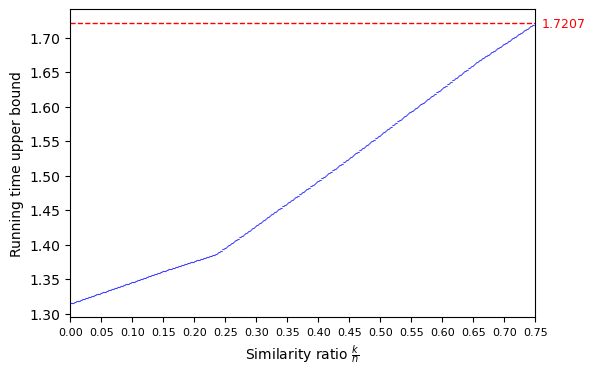

In [141]:
plt.figure(figsize=(6, 4))

# draw each [l, u] interval at height run
for _, row in df_appendix.iterrows():
    plt.hlines(
        y=row["run"],
        xmin=row["l"],
        xmax=row["u"],
        color='blue',
        linewidth=0.8
    )

# your red reference line
# plt.axhline(y=record, color='r')
last_run = df_appendix.iloc[-1]["run"]
plt.axhline(y=last_run, color='red', linestyle='--', linewidth=1)

# --- print the value on the plot ---
plt.text(
    0.76,                # x position (slightly to the right of the plot)
    last_run,            # y position
    f"{last_run:.4f}",   # displayed text
    color='red',
    va='center',
    fontsize=9
)

plt.xlim(0, 0.75)
plt.xticks(np.arange(0, 0.751, 0.05))
plt.tick_params(axis='x', labelsize=8)

# plt.xlabel(f"Analysis on {len(df_solver_result)} pieces")
plt.xlabel(r"Similarity ratio $\frac{k}{n}$")
plt.ylabel("Running time upper bound")

plt.show()

In [142]:
# # plt.scatter(df_appendix["u"], df_appendix["run"], s=0.1)
# plt.scatter(df_appendix["u"], df_appendix["run"], s=6000, marker="_")
# plt.axhline(y=record, color='r')

# plt.xlim(0, 0.75)
# plt.xticks(np.arange(0, 0.751, 0.05))
# plt.tick_params(axis='x', labelsize=8)   # make x-axis ticks smaller

# plt.show()

# Turn the dadaframe into latex file

In [143]:
latex_code = df_appendix.to_latex(index=True, longtable=True,
                                  caption='4-Coloring',
                                  label='tab:variable values',
                                  column_format='c|c|c|c|c|c|c|c|c|c|c',
                                  header=selected)

# print(latex_code)
with open("table_3289.tex", "w") as file:
    file.write(latex_code)

In [67]:
ls

fourc.ipynb     fourc_new.mod   fourc_new.run   results/        table_3289.tex
